# Generate tiles `geojson`

In [1]:
import sys
sys.path.append('../')
from src import tile_generation

In odc-geo GridSpec, tile_size has been renamed tile_shape and should be provided in pixels.
In odc-geo GridSpec, resolution is expected in (X, Y) order, or simply X if using square pixels with inverted Y axis.
In odc-geo GridSpec, origin is expected in (X, Y) order.
In odc-geo GridSpec, tile_size has been renamed tile_shape and should be provided in pixels.
In odc-geo GridSpec, resolution is expected in (X, Y) order, or simply X if using square pixels with inverted Y axis.
In odc-geo GridSpec, origin is expected in (X, Y) order.
In odc-geo GridSpec, tile_size has been renamed tile_shape and should be provided in pixels.
In odc-geo GridSpec, resolution is expected in (X, Y) order, or simply X if using square pixels with inverted Y axis.
In odc-geo GridSpec, origin is expected in (X, Y) order.
In odc-geo GridSpec, tile_size has been renamed tile_shape and should be provided in pixels.
In odc-geo GridSpec, resolution is expected in (X, Y) order, or simply X if using square pixels with in

In [2]:
resolution = 30
aoi_gdf_path = "../anciliary/GR_coastline_poly.geojson"
outfile = f"../anciliary/grid_{resolution}_v1.geojson"

In [3]:
tile_generation.get_tiles(resolution, aoi_gdf_path, outfile)

Using the grid lambert_gr_30 with GridSpec(crs=epsg:3035, tile_size=(48000.0, 48000.0), resolution=(-30, 30))


,tile_ids,geometry
0,x13_y03,"POLYGON ((23.59599 35.01952, 23.51681 34.58956..."
1,x14_y03,"POLYGON ((24.11077 34.94148, 24.02876 34.51204..."
2,x12_y04,"POLYGON ((23.15798 35.52478, 23.08031 35.09469..."
3,x13_y04,"POLYGON ((23.67655 35.4491, 23.59599 35.01952,..."
4,x14_y04,"POLYGON ((24.1942 35.37052, 24.11077 34.94148,..."
...,...,...
163,x12_y19,"POLYGON ((24.50466 41.93325, 24.40296 41.50842..."
164,x14_y19,"POLYGON ((25.63962 41.76076, 25.53053 41.33731..."
165,x15_y19,"POLYGON ((26.20494 41.66972, 26.09222 41.24699..."
166,x14_y20,"POLYGON ((25.75077 42.18386, 25.63962 41.76076..."


# Debug

In [4]:
import os
from typing import Tuple, Optional, Dict
import geopandas as gpd
from datacube.utils.geometry import CRS, Geometry
from datacube.model import GridSpec
from odc.io.text import split_and_check, parse_range_int

In [5]:
grid_name = f"lambert_gr_{resolution}"
grid, gridspec = tiling.parse_gridspec_with_name(grid_name)
print(f"Using the grid {grid} with {gridspec}")

Using the grid lambert_gr_30 with GridSpec(crs=epsg:3035, tile_size=(48000.0, 48000.0), resolution=(-30, 30))


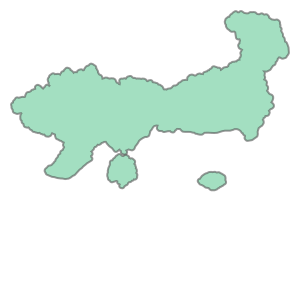

In [6]:
# From the GridSpec get the crs and resolution.
crs = gridspec.crs
resolution = abs(gridspec.resolution[0])

area_footprint = gpd.read_file(aoi_gdf_path).to_crs(crs)
# Get the product footprint geopolygon.
area_footprint = Geometry(geom=area_footprint.geometry[0], crs=crs)
area_footprint

In [7]:
tiles = gridspec.tiles_from_geopolygon(geopolygon=area_footprint)
tiles = list(tiles)
print(len(tiles))

19


In [8]:
tiles[0][1].geographic_extent.boundingbox

BoundingBox(left=24.108990411249405, bottom=40.14991659135358, right=24.762407040517537, top=40.657757903752085)

In [9]:
# Get the individual tile geometries.
tile_geometries = []
tile_geometries_3035 = []
region_code = []
ix = []
iy = []
for tile in tiles:
    tile_idx, tile_idy = tile[0]
    tile_geometry = tile[1].extent.geom

    tile_geometries_3035.append(tile_geometry)
    tile_geometries.append(tile_geometry)
    region_code.append(f"x{tile_idx:02d}_y{tile_idy:02d}")
    ix.append(tile_idx)
    iy.append(tile_idy)

tiles_gdf = gpd.GeoDataFrame(data={"region_code": region_code, "ix":ix, "iy":iy,"geometry":tile_geometries}, crs=3035)

if not os.path.isfile("../geojson/emt_grid_v1.geojson"):
    tiles_gdf.to_file("../geojson/emt_grid_v1.geojson", driver="GeoJSON")
tiles_gdf = tiles_gdf.to_crs(crs=4326)
tiles_gdf

,region_code,ix,iy,geometry
0,x03_y00,3,0,"POLYGON ((24.20517 40.65776, 24.10899 40.23192..."
1,x05_y00,5,0,"POLYGON ((25.31835 40.48933, 25.21515 40.0648,..."
2,x02_y01,2,1,"POLYGON ((23.74103 41.16339, 23.64668 40.73726..."
3,x03_y01,3,1,"POLYGON ((24.30314 41.08326, 24.20517 40.65776..."
4,x04_y01,4,1,"POLYGON ((24.86397 40.99996, 24.76241 40.57511..."
5,x05_y01,5,1,"POLYGON ((25.42346 40.9135, 25.31835 40.48933,..."
6,x06_y01,6,1,"POLYGON ((25.98158 40.82389, 25.87295 40.40042..."
7,x01_y02,1,2,"POLYGON ((23.27007 41.66676, 23.17766 41.24034..."
8,x02_y02,2,2,"POLYGON ((23.83716 41.58919, 23.74103 41.16339..."
9,x03_y02,3,2,"POLYGON ((24.40296 41.50842, 24.30314 41.08326..."


In [10]:
tiles_gdf.iloc[0].geometry.bounds

(24.108990411249405, 40.14991659135358, 24.762407040517537, 40.657757903752085)

In [11]:
import numpy as np
np.round(tiles_gdf.iloc[0].geometry.bounds,7)

array([24.1089904, 40.1499166, 24.762407 , 40.6577579])

In [12]:
tiles_gdf.to_crs(crs=3035).iloc[0].geometry.bounds

(5519985.000123947, 2015984.9992623113, 5567985.000131764, 2063984.99928765)

In [13]:
tiles[0][1].geographic_extent.boundingbox

BoundingBox(left=24.108990411249405, bottom=40.14991659135358, right=24.762407040517537, top=40.657757903752085)

In [14]:
gpd.read_file('../tests/ga_summary_grid_c3.geojson')

,region_code,ix,iy,utc_offset,geometry
0,x03y45,3,45,7,"POLYGON ((110.89578 -8.21784, 110.75669 -9.103..."
1,x04y45,4,45,7,"POLYGON ((111.72556 -8.3629, 111.59175 -9.2489..."
2,x05y24,5,24,7,"POLYGON ((109.45185 -26.55265, 109.27932 -27.3..."
3,x05y25,5,25,7,"POLYGON ((109.62181 -25.70976, 109.45185 -26.5..."
4,x05y26,5,26,7,"POLYGON ((109.78926 -24.86622, 109.62181 -25.7..."
...,...,...,...,...,...
1604,x55y41,55,41,10,"POLYGON ((155.36839 -11.42781, 155.52599 -12.2..."
1605,x55y42,55,42,10,"POLYGON ((155.21287 -10.55386, 155.36839 -11.4..."
1606,x55y43,55,43,10,"POLYGON ((155.05938 -9.67638, 155.21287 -10.55..."
1607,x55y44,55,44,10,"POLYGON ((154.90788 -8.79519, 155.05938 -9.676..."


In [15]:
p=gpd.read_file('../tests/ga_summary_grid_c3.geojson').iloc[0]

In [16]:
a = gpd.read_file('../tests/ga_summary_grid_c3.geojson')

In [17]:
np.round(a.to_crs(epsg=3577).iloc[0].geometry.bounds,7)

array([-2400000., -1152000., -2304000., -1056000.])

In [18]:
a.iloc[0].geometry.bounds

(110.75668865052428,
 -9.248988627689972,
 111.72555812201743,
 -8.217837041440635)

In [19]:
a.to_crs(epsg=3577).iloc[70].geometry.bounds

(-1824000.0, -1247999.9999999995, -1728000.0000000007, -1151999.9999999993)

In [20]:
a.to_crs(epsg=3577)

,region_code,ix,iy,utc_offset,geometry
0,x03y45,3,45,7,"POLYGON ((-2400000 -1056000, -2400000 -1152000..."
1,x04y45,4,45,7,"POLYGON ((-2304000 -1056000, -2304000 -1152000..."
2,x05y24,5,24,7,"POLYGON ((-2208000 -3072000, -2208000 -3168000..."
3,x05y25,5,25,7,"POLYGON ((-2208000 -2976000, -2208000 -3072000..."
4,x05y26,5,26,7,"POLYGON ((-2208000 -2880000, -2208000 -2976000..."
...,...,...,...,...,...
1604,x55y41,55,41,10,"POLYGON ((2592000 -1440000, 2592000 -1536000, ..."
1605,x55y42,55,42,10,"POLYGON ((2592000 -1344000, 2592000 -1440000, ..."
1606,x55y43,55,43,10,"POLYGON ((2592000 -1248000, 2592000 -1344000, ..."
1607,x55y44,55,44,10,"POLYGON ((2592000 -1152000, 2592000 -1248000, ..."
